#**TUGAS PRAKTIKUM 2**

**Import Library**

In [1]:
# --- Install library ---
!pip install scikit-learn matplotlib seaborn hdbscan

# --- Import library ---
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import hdbscan

/usr/local/lib/python3.12/dist-packages/hdbscan/plots.py:448: SyntaxWarning: invalid escape sequence '\l'
  axis.set_ylabel('$\lambda$ value')
/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


**Load dataset Iris**

In [2]:
iris = load_iris()
X = iris.data
y = iris.target  # label asli (setosa, versicolor, virginica)

**Clustering dengan HDBSCAN**

In [3]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5)
labels = clusterer.fit_predict(X)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


**Hitung jumlah cluster terbentuk (tidak termasuk noise = label -1)**

In [4]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Jumlah cluster terbentuk: {n_clusters}")
print(f"Banyaknya noise: {n_noise}")

Jumlah cluster terbentuk: 2
Banyaknya noise: 0


**Reduksi dimensi ke 2D pakai PCA untuk visualisasi**

In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

**Visualisasi hasil cluster HDBSCAN**

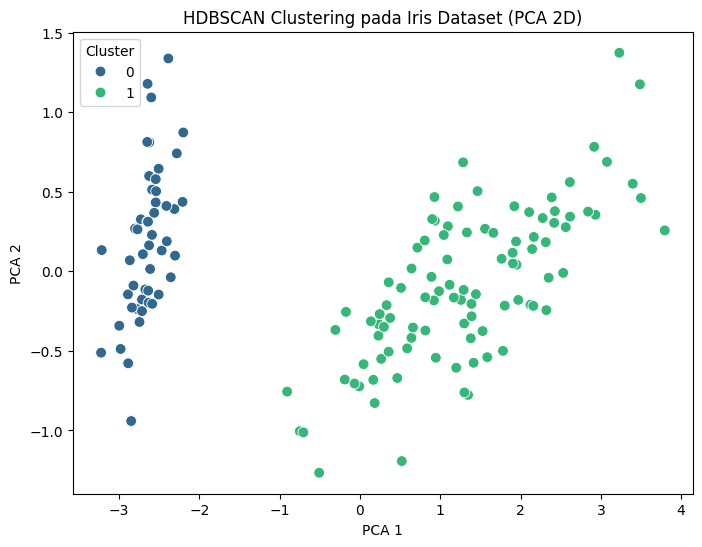

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette="viridis", s=60)
plt.title("HDBSCAN Clustering pada Iris Dataset (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()

**Visualisasi label asli untuk perbandingan**

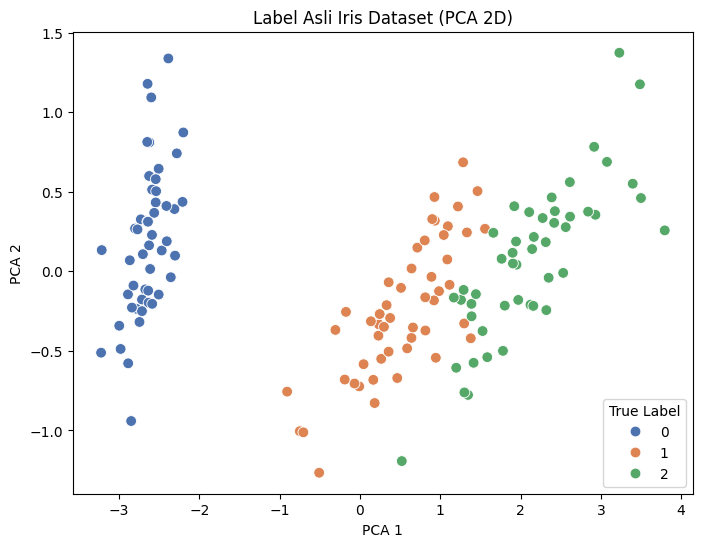

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette="deep", s=60)
plt.title("Label Asli Iris Dataset (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="True Label")
plt.show()

Jumlah cluster HDBSCAN: 2
Banyaknya noise: 0

Kesesuaian dengan label asli: Sebagian sesuai. HDBSCAN mampu mengenali satu kelas (Setosa) dengan sangat baik, tetapi menggabungkan dua kelas lain yang saling tumpang tindih.

Visualisasi PCA 2D: menunjukkan pemisahan cluster cukup jelas untuk satu kelas dan overlap untuk dua kelas lainnya.